## Grouping Vehicles based on Silhouette Images with Hierarchical Clustering

The data set has information about features of silhouette extracted from the images of different cars
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 
cars. 

This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars 
would be readily distinguishable, but it would be more difficult to distinguish between the cars.


### Import Libraries 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

### Read the dataset using function .dropna() - to avoid dealing with NAs

In [41]:
df = pd.read_csv('vehicle.csv').dropna()

In [42]:
df.shape

(813, 19)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [44]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### Print/ Plot the dependent (categorical variable) and Check for any missing values in the data

In [45]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(df['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

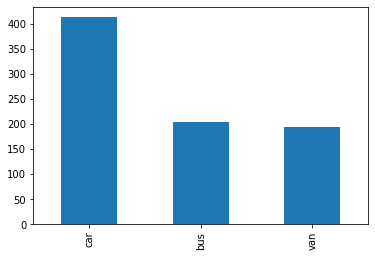

In [46]:
pd.value_counts(df["class"]).plot(kind="bar")

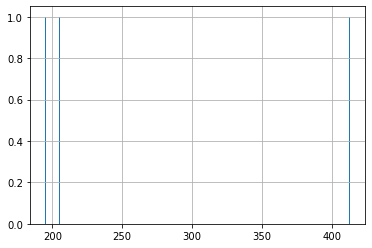

In [47]:
pd.value_counts(df['class']).hist(bins=300)

In [48]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### Standardize the Data

#### Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods. You can use zscore function to do this

In [50]:
interest_df = df.drop('class', axis=1)

In [51]:
interest_df_z = interest_df.apply(zscore)

In [52]:
interest_df_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [53]:
sc = StandardScaler()
X_std = sc.fit_transform(interest_df) 

In [54]:
X_std[:2]

array([[ 0.16323063,  0.52040788,  0.06066872,  0.26497017,  1.2832543 ,
         0.2997208 , -0.19851729,  0.12964799, -0.21715097,  0.76631152,
        -0.39739727, -0.33901388,  0.30167634, -0.32119222, -0.07152328,
         0.37128716, -0.3218087 ,  0.17183708],
       [-0.32287376, -0.61912319,  0.12406675, -0.83639333, -0.59925336,
         0.08578488, -0.59171992,  0.51433345, -0.60601383, -0.33746218,
        -0.59003405, -0.61875406, -0.50297155, -0.0535046 ,  0.53842522,
         0.14710858,  0.00340009,  0.44231829]])

## Apply Hierarchical Clustering

In [55]:
#### Generate the Linkage Matrix
Z_std = linkage(X_std, 'ward', metric='euclidean')
Z.shape

(812, 4)

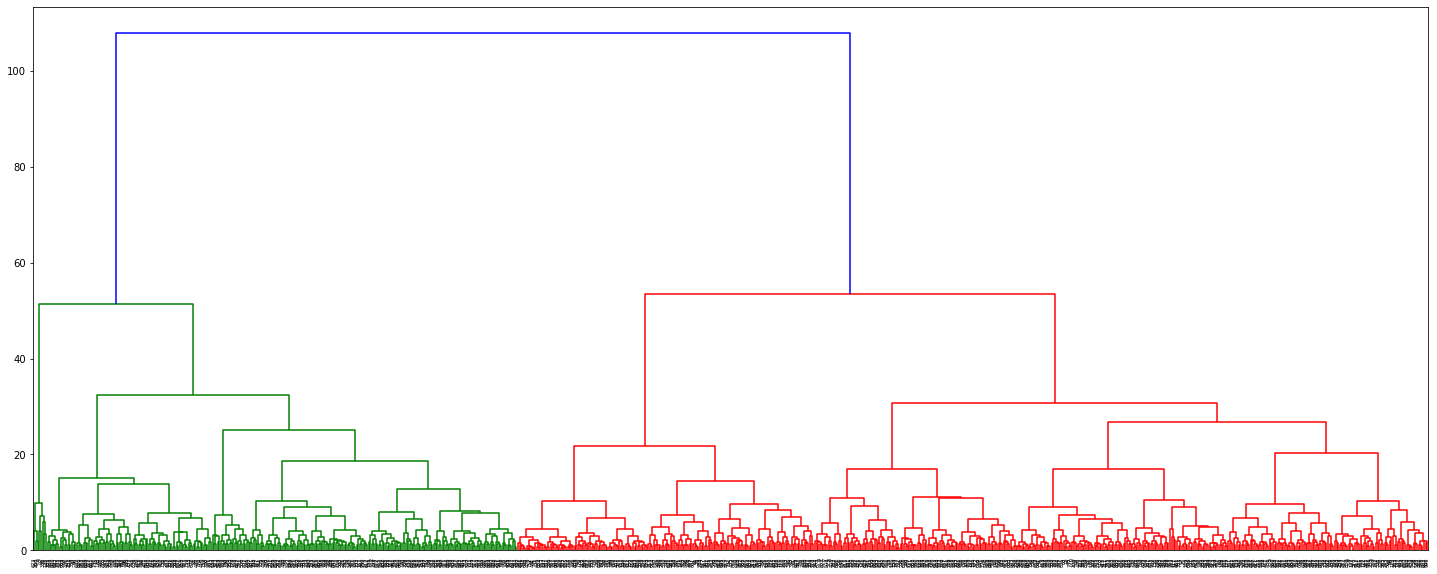

In [56]:
plt.figure(figsize=(25, 10))
dendrogram(Z_std)
plt.show()

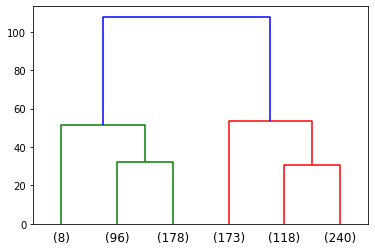

In [57]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z_std,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=6,  # show only the last p merged clusters
)
plt.show()

## Perform Clustering

In [58]:
max_d = 50
clusters = fcluster(Z_std, max_d, criterion='distance')
clusters

array([4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 2, 2, 4, 3, 4, 4, 2,
       4, 3, 2, 2, 3, 4, 4, 4, 2, 4, 3, 1, 2, 3, 2, 3, 4, 4, 2, 4, 4, 3,
       4, 4, 3, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 3, 3, 3, 2, 3, 2, 4, 2, 2,
       4, 3, 4, 2, 4, 3, 4, 2, 4, 3, 4, 2, 4, 3, 2, 3, 2, 4, 2, 4, 3, 2,
       3, 3, 2, 3, 1, 4, 4, 4, 2, 2, 4, 3, 2, 4, 4, 3, 3, 4, 4, 2, 2, 4,
       3, 4, 4, 4, 4, 4, 3, 4, 4, 2, 2, 4, 4, 3, 2, 1, 4, 4, 3, 4, 4, 2,
       3, 4, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 3, 2, 4, 4, 2, 2,
       4, 2, 3, 3, 2, 2, 4, 2, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 2, 4, 4, 2,
       4, 4, 4, 2, 4, 3, 2, 3, 3, 3, 4, 4, 2, 2, 4, 4, 4, 3, 2, 4, 4, 4,
       2, 4, 3, 2, 4, 4, 2, 4, 3, 3, 4, 2, 4, 2, 3, 3, 3, 3, 2, 4, 4, 4,
       2, 3, 4, 4, 3, 2, 4, 3, 4, 4, 2, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 3,
       4, 4, 4, 2, 3, 4, 4, 3, 3, 2, 4, 2, 4, 3, 3, 2, 4, 2, 3, 3, 2, 4,
       4, 2, 3, 4, 1, 4, 4, 2, 4, 2, 3, 4, 4, 2, 4, 4, 4, 3, 4, 2, 2, 2,
       4, 4, 4, 2, 3, 3, 4, 2, 3, 2, 2, 3, 2, 4, 3,

## Visualize the Clusters

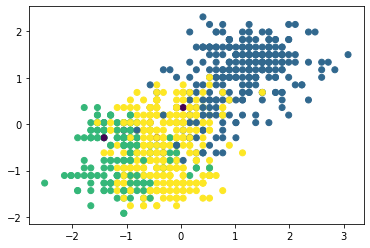

In [59]:
#### plt.figure(figsize=(10, 8))
plt.scatter(X_std[:,0], X_std[:,1], c=clusters)  # plot points with cluster dependent colors
plt.show()

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Hierarchical Clustering on Synthetic Data

### Create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [60]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### Combine all three arrays a,b,c into a dataframe

In [61]:
X = np.concatenate((a, b, c), axis=0)
print(X.shape)  # 250 samples with 2 dimensions

(250, 2)


### Use Scatter Matrix to print all the 3 Distributions

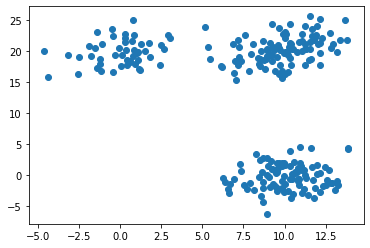

In [62]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## Find out the Linkage Matrix

Use ward as linkage metric and distance as Eucledian

In [63]:
#### Generate the Linkage Matrix

Z = linkage(X, 'ward', metric='euclidean')
Z.shape

(249, 4)

In [64]:
Z[:]

array([[6.00000000e+00, 3.50000000e+01, 4.03105214e-02, 2.00000000e+00],
       [1.59000000e+02, 2.47000000e+02, 4.15336058e-02, 2.00000000e+00],
       [1.90000000e+02, 2.14000000e+02, 4.23431904e-02, 2.00000000e+00],
       [1.50000000e+01, 5.50000000e+01, 5.03965285e-02, 2.00000000e+00],
       [2.30000000e+01, 9.70000000e+01, 5.98615830e-02, 2.00000000e+00],
       [1.83000000e+02, 2.30000000e+02, 7.14307127e-02, 2.00000000e+00],
       [1.60000000e+02, 1.84000000e+02, 8.10640748e-02, 2.00000000e+00],
       [5.20000000e+01, 9.80000000e+01, 8.63310058e-02, 2.00000000e+00],
       [1.75000000e+02, 2.33000000e+02, 9.07935743e-02, 2.00000000e+00],
       [8.00000000e+00, 1.90000000e+01, 1.05398862e-01, 2.00000000e+00],
       [6.60000000e+01, 7.30000000e+01, 1.08977001e-01, 2.00000000e+00],
       [5.90000000e+01, 9.60000000e+01, 1.15828291e-01, 2.00000000e+00],
       [9.20000000e+01, 2.53000000e+02, 1.34937651e-01, 3.00000000e+00],
       [2.10000000e+02, 2.31000000e+02, 1.37055098e

## Plot the Dendrogram for the Consolidated Dataframe

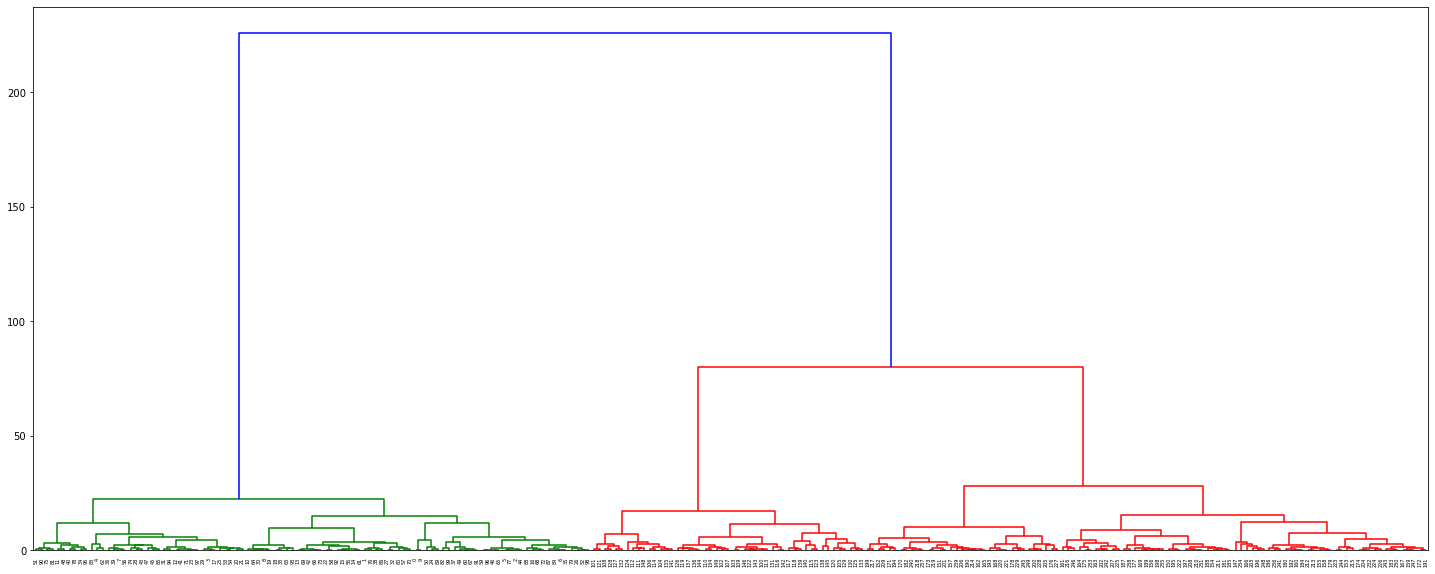

In [65]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

### Recreate the dendrogram for last 6 merged clusters

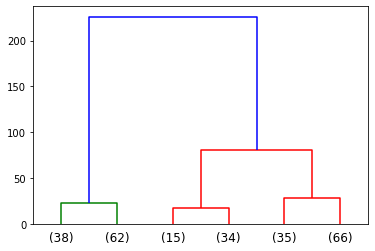

In [66]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=6,  # show only the last p merged clusters
)
plt.show()

### Recreate the dendrogram for last 3 merged clusters

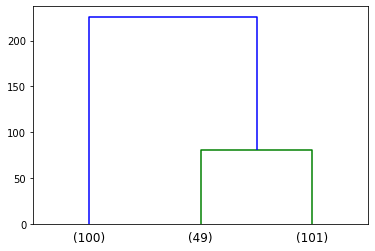

In [67]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

### From the truncated dendrogram, find out the optimal distance between clusters which you want to use as an input for clustering data

In [68]:
max_d = 50

### Use this distance measure(max_d) and fcluster function to cluster the data into 3 different groups

In [69]:
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

## Visualize
#### Use matplotlib to visually observe the clusters in 2D space

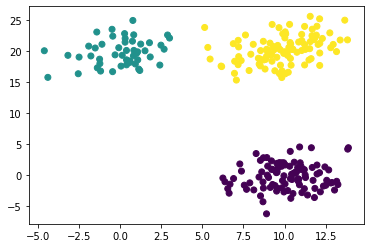

In [70]:
#### plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters)  # plot points with cluster dependent colors
plt.show()